# NBA Players selection using Machine Learning

### Project Description

<p>
Consider that I am having a basketball team and want to select some good players for my team. I would like to perform the following;

<br>

* <b>Machine Learning Model 1:</b> Classifying the players who will be staying with the league for more than 5 years or less than that. <br>
* <b>Machine Learning Model 2:</b> Considering the players who are good as input, will be predicting their position in the basketball court. <br>
* <b>Machine Learning Model 3:</b> Based on the above outputs, this model will predict their salaries.<br>

* <b>Web App:</b> Building a web app using Angular as front end and Python REST as back end, in which the user or the coach has to load the csv file containing the player’s history and this system will run the input through all these models and will  finalize the players list who are required for the team with their respective salaries and positions in the basketball court.
</p>

### Data

Data for the above mentioned machine learning models are being collected from the following sites;

* https://data.world/
* https://www.basketball-reference.com/
* https://www.kaggle.com/felixdonovan/predicting-the-all-nba-teams/data

The collected data undergoes the following data preparation steps such as cleaning, standardization, missing value imputation and et cetera.

### Data Loading and Preprorcessing, Descriptive Statistics, Visualisation and Machine Learning model building

#### Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
import pickle

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

%matplotlib inline

## With Model 1 Data

In [ ]:
ml_Model_1_Data = pd.read_csv("Data/nba_Longevity.csv")
ml_Model_1_Data.rename(columns ={"MIN":"MP","FGM":"FG","3P Made":"3P","FTM":"FT","OREB":"ORB","DREB":"DRB","REB":"TRB"},inplace=True)
ml_Model_1_Data.columns

In [ ]:
ml_Model_1_Data['TARGET_5Yrs'] = ml_Model_1_Data['TARGET_5Yrs'].astype('int64')
ml_Model_1_Data

In [ ]:
#Checking for missing values
ml_Model_1_Data.isna().sum()

In [ ]:
len(ml_Model_1_Data.index)

In [ ]:
ml_Model_1_Data = ml_Model_1_Data.dropna()

In [ ]:
#Imputing Missing values
ml_Model_1_Data = ml_Model_1_Data.fillna(ml_Model_1_Data.mean())
ml_Model_1_Data.isna().sum()

In [ ]:
#Feature selection
correlation_Matrix_1 = ml_Model_1_Data.corr()
features_1 = correlation_Matrix_1.index
plt.figure(figsize=(20,20))
ml_1_data_heatMap = sns.heatmap(ml_Model_1_Data[features_1].corr(),annot=True,cmap="RdYlGn")

<p>
    From the above correlation heatmap last row, we could see that <b>GP (Games Played)</b> is correlated well with the target variable followed by <b>MP (Minutes Played), PTS (Points), FG (Field Goals), etc.</b>, but features such as <b>3P (3-Point Field Goals), 3PA (3-Point Field Goal Attempts)</b> and <b>3P% (3-Point Field Goal Percentage)</b> are less or negative correlated with target variable. The above mentioned highly correlated features might decrease the performance of classification algorithms. 
</p>
<br>
<p>
    But, I would like to run the classification algorithms with all features and only with selected features, compare their performance and select the model.
</p>

In [ ]:
#Checking whether data are imbalanced or not
plt.figure(figsize=(10,10))
plt.rcParams["xtick.labelsize"] = 20
imbalance = sns.countplot(x='TARGET_5Yrs',hue="TARGET_5Yrs",data=ml_Model_1_Data)

From the above countplot, we could see that this dataset is imbalanced by having over <b>800</b> records for Yes i.e. 1 and <b>500</b> records for No i.e. 0

In [ ]:
sns.pairplot(ml_Model_1_Data)

In [ ]:
#Checking for linear separability
sns.set_style("whitegrid")
sns.FacetGrid(ml_Model_1_Data, hue="TARGET_5Yrs", height=10) \
   .map(plt.scatter, "GP", "PTS") \
   .add_legend()
plt.show()

<p>
    From the above plot, we can see two things; Firstly, the data is not linearly separable, hence we need to apply non-linear classification algorithms such as <b> SVM Kernel, k-nearest-neighbors (kNN), etc.</b>. Secondly, The players who stay with the league for more than 5 years have played more games and scored more points when compared with players who had stayed with the league for less than 5 years.
</p>

In [ ]:
ml_Model_1_Data_With_All_Features = ml_Model_1_Data
ml_Model_1_Data_With_Selected_Features = ml_Model_1_Data

ml_Model_1_Data_With_Selected_Features = ml_Model_1_Data_With_Selected_Features.drop(['3P','3PA','3P%'],axis=1)

#Segregating dependent variable and independent variables
x1 = ml_Model_1_Data_With_All_Features.iloc[:,1:-1] #Independent variables.
y1 = ml_Model_1_Data_With_All_Features.iloc[:,-1] #Dependent or target variable.

x2 = ml_Model_1_Data_With_All_Features.iloc[:,1:-1] #Independent variables.
y2 = ml_Model_1_Data_With_All_Features.iloc[:,-1] #Dependent or target variable.

x3 = ml_Model_1_Data_With_Selected_Features.iloc[:,1:-1] #Independent variables.
y3 = ml_Model_1_Data_With_Selected_Features.iloc[:,-1] #Dependent or target variable.

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(x2, y2)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(x2)
# Summarize selected features
print(features[0:10,:])

#GP, MP, PTS, FG, FGA, FT, FTA, ORB, DRB, TRB

In [ ]:
x2 = x2.iloc[:,[0,1,2,3,4,9,10,12,13,14]]

In [ ]:
#Splitting the data into train and test
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(x1, y1, test_size=0.2, random_state=0)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(x2, y2, test_size=0.2, random_state=0)
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(x3, y3, test_size=0.2, random_state=0)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=27)
X_train_1,Y_train_1 = sm.fit_resample(X_train_1,Y_train_1)
X_train_3,Y_train_3 = sm.fit_resample(X_train_3,Y_train_3)
X_train_2,Y_train_2 = sm.fit_resample(X_train_2,Y_train_2)

In [ ]:
Y_train_1.value_counts()

In [ ]:
#Scaling
sc_X_1 = StandardScaler()
X_train_1 = sc_X_1.fit_transform(X_train_1)
X_test_1 = sc_X_1.transform(X_test_1)

sc_X_3 = StandardScaler()
X_train_3 = sc_X_3.fit_transform(X_train_3)
X_test_3 = sc_X_3.transform(X_test_3)

sc_X_2 = StandardScaler()
X_train_2 = sc_X_2.fit_transform(X_train_2)
X_test_2 = sc_X_2.transform(X_test_2)

In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [ ]:
#Model Fitting
def SVMModel(X_train,X_test,Y_train,Y_test):
    svclassifier_1 = SVC(kernel='rbf',probability=True,C=1).fit(X_train, Y_train)
    probas_1 = svclassifier_1.predict_proba(X_train)
    probas_2 = svclassifier_1.predict_proba(X_test)

    #Prediction and evaluation
    Y_svm_pred_1 = svclassifier_1.predict(X_train)
    Y_svm_pred_2 = svclassifier_1.predict(X_test)
    
    print("\n###############Training######################\n")
    print("Confusion Matrix : \n", confusion_matrix(Y_train, Y_svm_pred_1))
    print("Accuracy: ",round(accuracy(confusion_matrix(Y_train, Y_svm_pred_1)),2))

    print('Precision : {}'.format(round(precision_score(Y_train, Y_svm_pred_1),3)))
    print('Recall    : {}'.format(round(recall_score(Y_train, Y_svm_pred_1),3)))
    print('F-score   : {}'.format(round(f1_score(Y_train, Y_svm_pred_1),3)))
    
    fpr_1, tpr_1, thresholds_1 = roc_curve(Y_train, probas_1[:, 1])
    roc_auc_1 = round(auc(fpr_1, tpr_1),2)
    print("\nArea under the ROC curve for train : %f" % roc_auc_1)

    print("\n###############Testing######################\n")
    print("Confusion Matrix : \n", confusion_matrix(Y_test, Y_svm_pred_2))
    print("Accuracy: ",round(accuracy(confusion_matrix(Y_test, Y_svm_pred_2)),2))

    print('Precision : {}'.format(round(precision_score(Y_test, Y_svm_pred_2),3)))
    print('Recall    : {}'.format(round(recall_score(Y_test, Y_svm_pred_2),3)))
    print('F-score   : {}'.format(round(f1_score(Y_test, Y_svm_pred_2),3)))
    
    fpr_2, tpr_2, thresholds_2 = roc_curve(Y_test, probas_2[:, 1])
    roc_auc_2 = round(auc(fpr_2, tpr_2),2)
    print("\nArea under the ROC curve for test : %f" % roc_auc_2)
    
    plt.clf()
    plt.figure(figsize=(7,7))
    plt.plot(fpr_1, tpr_1, label='Train ROC curve (area = %0.2f)' % roc_auc_1)
    plt.plot(fpr_2, tpr_2, label='Test ROC curve (area = %0.2f)' % roc_auc_2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return svclassifier_1

#### With all features

In [ ]:
model_1_1 = SVMModel(X_train_1, X_test_1, Y_train_1, Y_test_1)

#### With selected features

In [ ]:
model_1_2 = SVMModel(X_train_3, X_test_3, Y_train_3, Y_test_3)

#### With features from feature selection

In [ ]:
model_1_3 = SVMModel(X_train_2, X_test_2, Y_train_2, Y_test_2)

<img src="Docs/Depiction-of-a-ROC-Curve.jpg"></img>
<p>
    From the above AUC ROC curve plots (<b> with all features</b>, <b> With selected features based on domain knowledge </b> and <b> with features selected using feature selection techniques </b>), it can be seen that model performs better with all features than with selected features. Also comparing our AUC ROC curve plot(with all features) with the above theoritical AUC ROC curve, it can be seen that our model is a <b> skillful classifier </b>.
Since the dataset is imbalanced, we need to use different metrics to evaluate the model, hence I have chosen AUC ROC curve over accuracy. Based on the observation, I have found that AUC ROC value with all features is higher (<b>76% for test data and 80% for training data</b>) than the ROC value with selected features.
<br>
<br>
Moreover, we could see that the model's performance is average, this could be because of one of the following reasons:
    <br>
    <b>*</b> Imbalanced Dataset <br>
    <b>*</b> Small data size
</p>

#### Saving the model

In [ ]:
filename = 'ML_Models/Career_Longevity.sav'
pickle.dump(model_1_1, open(filename, 'wb'))

## With Model 2 Data

In [2]:
seasons_Data = pd.read_csv("Data/1990_2017_Season_Data.csv")
seasons_Data.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary'],
      dtype='object')

In [3]:
#seasons_Data[['Pos']] = seasons_Data.Pos.str.split("-").str[0]
#seasons_Data = seasons_Data[seasons_Data['Pos'].str.len()<=2]
seasons_Data['Pos_New'] = seasons_Data['Pos'].apply(lambda x: x.split('-')[0])
seasons_Data = seasons_Data[seasons_Data['G']>=30]
seasons_Data['Pos_New'].value_counts()

PF    2228
PG    2153
SG    2111
C     2072
SF    2035
Name: Pos_New, dtype: int64

In [4]:
seasons_Data.drop(columns=['blanl','blank2','Unnamed: 0','Year','Player','Tm','Salary','Pos'],inplace=True,axis=1)
ml_Model_2_Data = seasons_Data
ml_Model_2_Data

Age     G    GS      MP   PER    TS%   3PAr    FTr  ORB%  DRB%  ...  \
0      27.0  80.0  50.0  1691.0   8.3  0.536  0.014  0.421   9.3  17.8  ...   
1      27.0  79.0  74.0  2690.0  15.4  0.542  0.437  0.317   1.8   7.3  ...   
2      30.0  78.0  40.0  2005.0  15.8  0.544  0.104  0.283   6.7  10.6  ...   
3      30.0  75.0  68.0  2727.0  16.1  0.528  0.250  0.231   2.9  10.6  ...   
4      26.0  82.0  10.0  1893.0  14.1  0.510  0.062  0.169   8.5  12.8  ...   
...     ...   ...   ...     ...   ...    ...    ...    ...   ...   ...  ...   
15111  28.0  74.0  74.0  2237.0  14.9  0.562  0.172  0.125   6.7  15.8  ...   
15112  24.0  62.0  58.0  1725.0  16.7  0.604  0.002  0.442   8.6  17.3  ...   
15113  27.0  51.0   5.0   525.0  13.0  0.508  0.006  0.247   9.2  17.0  ...   
15115  22.0  44.0  18.0   843.0   6.9  0.503  0.448  0.181   1.9  14.2  ...   
15116  19.0  38.0  11.0   609.0  17.0  0.547  0.013  0.206   7.1  21.9  ...   

         ORB    DRB    TRB    AST    STL   BLK    TOV     PF     PTS  Pos_New  
0      154.0  277.0  431.0   67.0   36.0  25.0   70.0  248.0   362.0        C  
1       49.0  176.0  225.0  495.0  121.0   3.0  141.0  133.0  1221.0       PG  
2      117.0  188.0  305.0  145.0   34.0  19.0  121.0  201.0  1099.0       SF  
3       69.0  257.0  326.0  453.0  113.0  18.0  185.0  238.0  1342.0       PG  
4      151.0  223.0  374.0  142.0   60.0  39.0  101.0  219.0   860.0       PF  
...      ...    ...    ...    ...    ...   ...    ...    ...     ...      ...  
15111  131.0  318.0  449.0  122.0  114.0  30.0   96.0  135.0   814.0       PF  
15112  135.0  270.0  405.0   99.0   62.0  58.0   65.0  189.0   639.0       PF  
15113   43.0   81.0  124.0   42.0    7.0  21.0   20.0   61.0   178.0        C  
15115   15.0  110.0  125.0   36.0   15.0  16.0   40.0   78.0   240.0       SF  
15116   41.0  118.0  159.0   30.0   14.0  33.0   30.0   66.0   284.0        C  

[10599 rows x 47 columns]

In [5]:
#Checking for missing values
ml_Model_2_Data.isna().sum()

Age           0
G             0
GS            0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
ORB%          0
DRB%          0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%        1088
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           3
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Pos_New       0
dtype: int64

In [6]:
#Imputing Missing values
ml_Model_2_Data = ml_Model_2_Data.fillna(ml_Model_2_Data.median())
ml_Model_2_Data.isna().sum()

Age        0
G          0
GS         0
MP         0
PER        0
TS%        0
3PAr       0
FTr        0
ORB%       0
DRB%       0
TRB%       0
AST%       0
STL%       0
BLK%       0
TOV%       0
USG%       0
OWS        0
DWS        0
WS         0
WS/48      0
OBPM       0
DBPM       0
BPM        0
VORP       0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Pos_New    0
dtype: int64

In [7]:
ml_Model_2_Data.columns

Index(['Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_New'],
      dtype='object')

In [7]:
ml_Model_2_Data['Pos_New'].value_counts()

PF    2228
PG    2153
SG    2111
C     2072
SF    2035
Name: Pos_New, dtype: int64

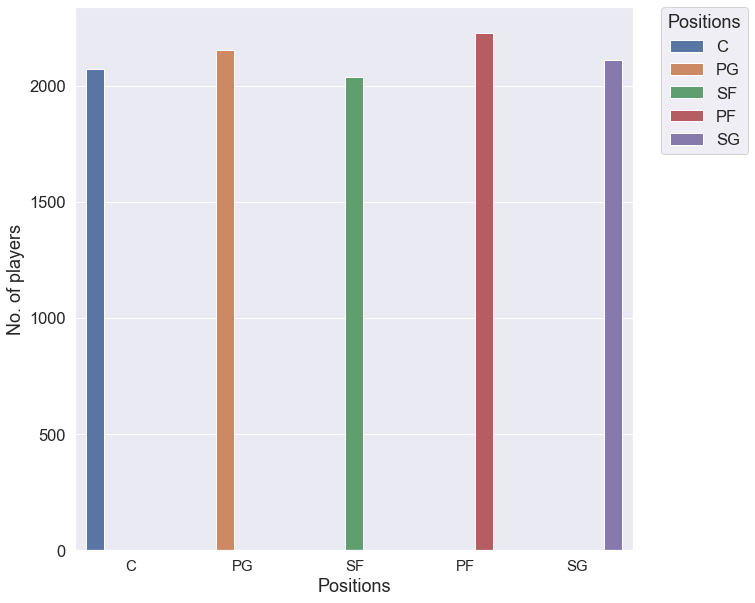

In [8]:
# Count of target labels and to check for imbalance dataset
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.rcParams["xtick.labelsize"] = 15
imbalance = sns.countplot(x='Pos_New',hue="Pos_New",data=ml_Model_2_Data)
imbalance.set(xlabel='Positions', ylabel='No. of players')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="Positions")

###### From the above countplot, we could see that this dataset is not imbalanced which could make our model better in predicting positions of players

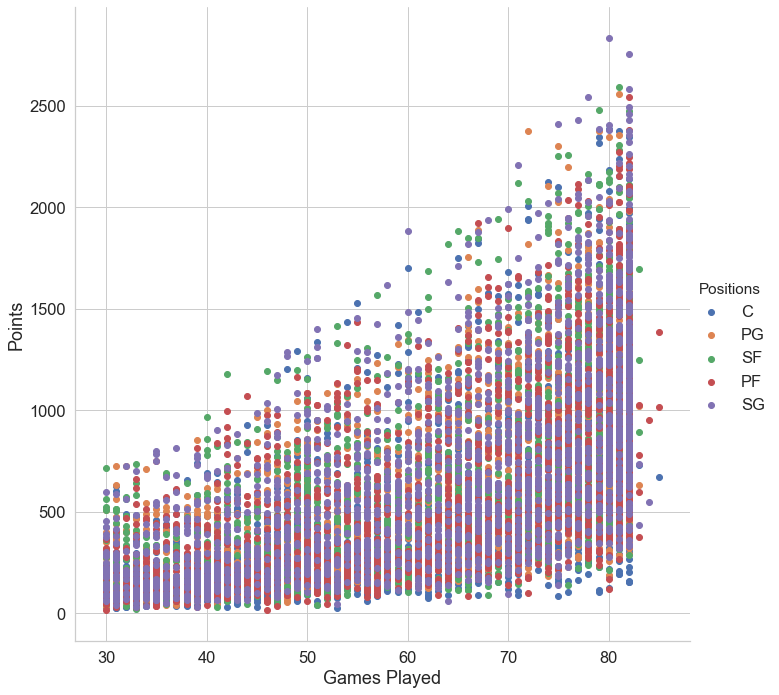

In [9]:
#Checking for linear separability
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.FacetGrid(ml_Model_2_Data, hue="Pos_New", height=10) \
   .map(plt.scatter, "G", "PTS") \
   .add_legend() \
   .set_axis_labels(x_var='Games Played', y_var='Points') \
   ._legend.set_title("Positions")
   #.axes[0,0].set_ylabel('axes label 1')
plt.show()

From the above plot, we can see two things; Firstly, the data is not linearly separable, hence we need to apply non-linear classification algorithms such as SVM Kernel, k-nearest-neighbors (kNN), etc.. Secondly, The players who have positions Small Forward (SF) are more in number and have scored more scores in the number of games they have played.

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

dataset = ml_Model_2_Data.values
x = dataset[:,0:46]
y = dataset[:,-1]
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(x, y)
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)
# summarize selected features
print(features[0:10,:])
cols = test.get_support(indices=True)
print(cols)

[4.881e+00 2.147e+00 4.755e+00 3.098e+01 2.282e+01 3.023e+01 1.212e+03
 3.725e+02 4.297e+03 4.344e+03 6.439e+03 4.162e+03 6.557e+02 2.535e+03
 4.513e+02 1.151e+02 1.117e+01 8.793e+01 4.568e+00 6.348e+01 3.203e+02
 8.535e+02 9.432e+00 6.555e+00 3.404e+01 8.208e+01 6.815e+02 7.132e+02
 7.996e+02 3.543e+02 2.002e+01 1.317e+01 2.594e+02 6.369e+01 1.356e+01
 7.253e+00 5.478e+02 1.117e+03 4.587e+02 6.827e+02 1.123e+03 2.754e+02
 9.923e+02 9.033e+01 1.850e+02 5.276e+01]
[[0.014 9.3 17.8 13.4 5.0 0.8 0.2 154.0 67.0 25.0]
 [0.4370000000000001 1.8 7.3 4.4 23.3 0.1 -0.9 49.0 495.0 3.0]
 [0.104 6.7 10.6 8.7 11.6 0.6 -0.5 117.0 145.0 19.0]
 [0.25 2.9 10.6 6.8 25.5 0.4 -0.6 69.0 453.0 18.0]
 [0.062 8.5 12.8 10.7 10.5 1.2 -0.6 151.0 142.0 39.0]
 [0.159 0.8 8.5 4.7 21.2 0.6 -2.0 2.0 39.0 3.0]
 [0.029 7.5 13.4 10.5 4.4 1.5 -1.3 49.0 23.0 19.0]
 [0.0 9.8 23.6 16.6 2.7 2.6 -0.8 112.0 24.0 54.0]
 [0.023 6.1 12.7 9.3 10.5 1.0 -1.0 107.0 124.0 34.0]
 [0.474 5.9 18.8 11.9 13.4 0.9 -0.1 33.0 55.0 9.0]]
[ 6  8

In [11]:
ml_Model_2_Data.columns

Index(['Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_New'],
      dtype='object')

In [12]:
selected_Features = ['Pos_New','3PAr','ORB%','DRB%','TRB%','AST%','BLK%','DBPM','ORB','AST','BLK']
feature_selected_data = ml_Model_2_Data[selected_Features]
feature_selected_data.head()

Pos_New   3PAr  ORB%  DRB%  TRB%  AST%  BLK%  DBPM    ORB    AST   BLK
0       C  0.014   9.3  17.8  13.4   5.0   0.8   0.2  154.0   67.0  25.0
1      PG  0.437   1.8   7.3   4.4  23.3   0.1  -0.9   49.0  495.0   3.0
2      SF  0.104   6.7  10.6   8.7  11.6   0.6  -0.5  117.0  145.0  19.0
3      PG  0.250   2.9  10.6   6.8  25.5   0.4  -0.6   69.0  453.0  18.0
4      PF  0.062   8.5  12.8  10.7  10.5   1.2  -0.6  151.0  142.0  39.0

In [16]:
#with all features
b4_Ft_Selection = ml_Model_2_Data
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(b4_Ft_Selection.drop(labels = ['Pos_New'],axis=1), b4_Ft_Selection['Pos_New'], 
                                                    test_size=0.2, random_state=0)

#Scaling
sc_X = StandardScaler()
X_train_all = sc_X.fit_transform(X_train_all)
X_test_all = sc_X.transform(X_test_all)

In [17]:
#with selected features
selected_data = feature_selected_data
X_train_selected, X_test_selected, Y_train_selected, Y_test_selected = train_test_split(selected_data.drop(labels = ['Pos_New'],axis=1), selected_data['Pos_New'], 
                                                    test_size=0.25, random_state=123)

#Scaling
sc_X = StandardScaler()
X_train_selected = sc_X.fit_transform(X_train_selected)
X_test_selected = sc_X.transform(X_test_selected)

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10, 100,1000,10000],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf']}  
clf = GridSearchCV(SVC(), param_grid, cv=3,verbose = 3)
clf.fit(X_train_all,Y_train_all)
# print best parameter after tuning 
print(clf.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(clf.best_estimator_) 

grid_prediction_train = clf.predict(X_train_all) 
  
# print classification report 
print(metrics.classification_report(Y_train_all, grid_prediction_train)) 

grid_prediction_test = clf.predict(X_test_all) 
  
# print classification report 
print(metrics.classification_report(Y_test_all, grid_prediction_test)) 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.237, total=   4.3s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.236, total=   4.3s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.5s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.239, total=   4.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.683, total=   2.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.694, total=   2.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.679, total=   2.7s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.701, total=   1.7s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.694, total=   1.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.680, total=   1.6s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.1min finished


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           C       0.81      0.81      0.81      1667
          PF       0.71      0.73      0.72      1810
          PG       0.88      0.91      0.90      1718
          SF       0.69      0.68      0.69      1619
          SG       0.74      0.72      0.73      1665

    accuracy                           0.77      8479
   macro avg       0.77      0.77      0.77      8479
weighted avg       0.77      0.77      0.77      8479

              precision    recall  f1-score   support

           C       0.76      0.75      0.76       405
          PF       0.60      0.66      0.63       418
          PG       0.85      0.89      0.87       435
      

In [20]:
#Model Fitting
from sklearn.neighbors import KNeighborsClassifier
def SVMModel2(X_train,X_test,Y_train,Y_test,c,g):
    svclassifier_1 = SVC(kernel='rbf',probability=False,C=c,gamma=g).fit(X_train, Y_train)
    
    #Prediction and evaluation
    Y_svm_pred_1 = svclassifier_1.predict(X_train)
    Y_svm_pred_2 = svclassifier_1.predict(X_test)
    
    print("\n###############Training######################\n")
    print("Confusion Matrix : \n", confusion_matrix(Y_train, Y_svm_pred_1))
    print(metrics.classification_report(Y_train, Y_svm_pred_1,digits=2))

    print("\n###############Testing######################\n")
    print("Confusion Matrix : \n", confusion_matrix(Y_test, Y_svm_pred_2))    
    print(metrics.classification_report(Y_test, Y_svm_pred_2,digits=2))

    return svclassifier_1

In [24]:
model_2_1 = SVMModel2(X_train_selected, X_test_selected, Y_train_selected, Y_test_selected,10000,0.01)


###############Training######################

Confusion Matrix : 
 [[1214  318    0   32    3]
 [ 422  987    3  228   32]
 [   0    0 1405   11  174]
 [  36  198   13  926  345]
 [   1   17  222  287 1075]]
              precision    recall  f1-score   support

           C       0.73      0.77      0.75      1567
          PF       0.65      0.59      0.62      1672
          PG       0.86      0.88      0.87      1590
          SF       0.62      0.61      0.62      1518
          SG       0.66      0.67      0.67      1602

    accuracy                           0.71      7949
   macro avg       0.70      0.71      0.70      7949
weighted avg       0.70      0.71      0.70      7949


###############Testing######################

Confusion Matrix : 
 [[375 116   0  12   2]
 [148 310   2  90   6]
 [  0   3 491   5  64]
 [ 16  75   6 293 127]
 [  1   8  68  99 333]]
              precision    recall  f1-score   support

           C       0.69      0.74      0.72       505
        

In [23]:
model_2_2 = SVMModel2(X_train_all, X_test_all, Y_train_all, Y_test_all,10,0.01)


###############Training######################

Confusion Matrix : 
 [[1342  301    0   22    2]
 [ 292 1318    2  184   14]
 [   0    1 1568   11  138]
 [  15  220   15 1098  271]
 [   0   17  189  265 1194]]
              precision    recall  f1-score   support

           C       0.81      0.81      0.81      1667
          PF       0.71      0.73      0.72      1810
          PG       0.88      0.91      0.90      1718
          SF       0.69      0.68      0.69      1619
          SG       0.74      0.72      0.73      1665

    accuracy                           0.77      8479
   macro avg       0.77      0.77      0.77      8479
weighted avg       0.77      0.77      0.77      8479


###############Testing######################

Confusion Matrix : 
 [[305  96   0   4   0]
 [ 88 274   0  52   4]
 [  0   0 389   2  44]
 [  5  76   3 252  80]
 [  1   8  68  74 295]]
              precision    recall  f1-score   support

           C       0.76      0.75      0.76       405
        

#### Saving the model

In [25]:
filename = 'ML_Models/NBA_Player_Position.sav'
pickle.dump(model_2_2, open(filename, 'wb'))

## With Model 3 Data

In [123]:
seasons_Stats_1990_2017 = pd.read_csv("Data/1990_2017_Season_Data.csv")

In [124]:
seasons_Stats_1990_2017.shape

(15117, 54)

In [125]:
seasons_Stats_1990_2017 = seasons_Stats_1990_2017.drop(labels = ['Unnamed: 0','blanl','blank2',"Year","Tm","Player","Pos",'Age'],axis=1)

In [126]:
seasons_Stats_1990_2017.columns

Index(['G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary'],
      dtype='object')

In [127]:
#seasons_Stats_1990_2017['Pos_New'] = seasons_Stats_1990_2017['Pos'].apply(lambda x: x.split('-')[0])
seasons_Stats_1990_2017 = seasons_Stats_1990_2017[seasons_Stats_1990_2017['G']>=30]
seasons_Stats_1990_2017.head()

G    GS      MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  ...  \
0  80.0  50.0  1691.0   8.3  0.536  0.014  0.421   9.3  17.8  13.4  ...   
1  79.0  74.0  2690.0  15.4  0.542  0.437  0.317   1.8   7.3   4.4  ...   
2  78.0  40.0  2005.0  15.8  0.544  0.104  0.283   6.7  10.6   8.7  ...   
3  75.0  68.0  2727.0  16.1  0.528  0.250  0.231   2.9  10.6   6.8  ...   
4  82.0  10.0  1893.0  14.1  0.510  0.062  0.169   8.5  12.8  10.7  ...   

     ORB    DRB    TRB    AST    STL   BLK    TOV     PF     PTS   Salary  
0  154.0  277.0  431.0   67.0   36.0  25.0   70.0  248.0   362.0   437000  
1   49.0  176.0  225.0  495.0  121.0   3.0  141.0  133.0  1221.0   825000  
2  117.0  188.0  305.0  145.0   34.0  19.0  121.0  201.0  1099.0  1115000  
3   69.0  257.0  326.0  453.0  113.0  18.0  185.0  238.0  1342.0   725000  
4  151.0  223.0  374.0  142.0   60.0  39.0  101.0  219.0   860.0   500000  

[5 rows x 46 columns]

In [128]:
seasons_Stats_1990_2017.isna().sum()

G            0
GS           0
MP           0
PER          0
TS%          0
3PAr         0
FTr          0
ORB%         0
DRB%         0
TRB%         0
AST%         0
STL%         0
BLK%         0
TOV%         0
USG%         0
OWS          0
DWS          0
WS           0
WS/48        0
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%       1088
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          3
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Salary       0
dtype: int64

In [129]:
seasons_Stats_1990_2017 = seasons_Stats_1990_2017.fillna(seasons_Stats_1990_2017.median())
seasons_Stats_1990_2017.isna().sum()

G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Salary    0
dtype: int64

In [130]:
seasons_Stats_1990_2017.head()

G    GS      MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  ...  \
0  80.0  50.0  1691.0   8.3  0.536  0.014  0.421   9.3  17.8  13.4  ...   
1  79.0  74.0  2690.0  15.4  0.542  0.437  0.317   1.8   7.3   4.4  ...   
2  78.0  40.0  2005.0  15.8  0.544  0.104  0.283   6.7  10.6   8.7  ...   
3  75.0  68.0  2727.0  16.1  0.528  0.250  0.231   2.9  10.6   6.8  ...   
4  82.0  10.0  1893.0  14.1  0.510  0.062  0.169   8.5  12.8  10.7  ...   

     ORB    DRB    TRB    AST    STL   BLK    TOV     PF     PTS   Salary  
0  154.0  277.0  431.0   67.0   36.0  25.0   70.0  248.0   362.0   437000  
1   49.0  176.0  225.0  495.0  121.0   3.0  141.0  133.0  1221.0   825000  
2  117.0  188.0  305.0  145.0   34.0  19.0  121.0  201.0  1099.0  1115000  
3   69.0  257.0  326.0  453.0  113.0  18.0  185.0  238.0  1342.0   725000  
4  151.0  223.0  374.0  142.0   60.0  39.0  101.0  219.0   860.0   500000  

[5 rows x 46 columns]

In [131]:
ml_Model_3_Data = seasons_Stats_1990_2017
ml_Model_3_Data.shape

(10599, 46)

In [ ]:
working_ml_Model_3_Data_Renamed = working_ml_Model_3_Data
working_ml_Model_3_Data_Renamed.rename(columns={"WS/48":"WS48","TS%":"TSPerc","ORB%":"ORBPerc",
"DRB%":"DRBPerc","TRB%":"TRBPerc","AST%":"ASTPerc","STL%":"STLPerc","BLK%":"BLKPerc",
"TOV%":"TOVPerc","USG%":"USGPerc","FG%":"FGPerc","3P%":"threePtPerc","2P%":"twoPtPPerc",
"eFG%":"eFGPerc","FT%":"FTPerc","3PAr":"threePAr","3P":"threePts","3PA":"threePtAttempts",
"2P":"twoPts","2PA":"twoPtAttempts"},inplace=True)

In [ ]:
working_ml_Model_3_Data_Renamed.columns

In [63]:
def vif_Calculate(dataset):
    mCols = dataset.columns.tolist()
    mCols.remove("Salary")
    y, X = dmatrices('Salary ~'+ "+".join(mCols), data=dataset, return_type='dataframe')

    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['VIF'] = [round(variance_inflation_factor(X.values, i),0) for i in range(X.shape[1])]

    #view VIF for each explanatory variable 
    return vif

In [64]:
#Feature selection
def correlationPlot(dataSet):
    correlation_Matrix_3 = dataSet.corr()
    features_3 = correlation_Matrix_3.index
    plt.figure(figsize=(50,20))
    ml_3_data_heatMap = sns.heatmap(dataSet[features_3].corr(),annot=True,cmap="RdYlGn")

In [135]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions

dataset = ml_Model_3_Data.values
x = dataset[:,0:46]
y = dataset[:,-1]
test = SelectKBest(score_func=f_regression, k=15)
fit = test.fit(x, y)
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)
# summarize selected features
print(features[0:10,:])
cols = test.get_support(indices=True)
print(cols)

[1.734e+02 1.589e+03 1.414e+03 1.610e+03 3.434e+02 3.680e+01 2.110e+00
 3.361e+01 3.355e+02 8.489e+01 2.260e+02 1.700e+01 2.029e+01 2.103e+02
 8.751e+02 1.318e+03 1.116e+03 1.597e+03 8.537e+02 1.152e+03 1.968e+02
 1.431e+03 1.520e+03 1.671e+03 1.721e+03 8.510e+01 8.374e+02 8.927e+02
 4.913e+01 1.238e+03 1.236e+03 1.447e+02 2.265e+02 1.358e+03 1.262e+03
 1.773e+02 2.793e+02 1.681e+03 1.165e+03 6.930e+02 5.132e+02 2.900e+02
 1.133e+03 3.375e+02 1.788e+03 5.966e+18]
[[ 5.000e+01  1.691e+03  8.300e+00  1.100e+00  1.600e+00 -2.000e+00
   0.000e+00  1.380e+02  2.850e+02  1.350e+02  8.300e+01  1.200e+02
   2.770e+02  3.620e+02  4.370e+05]
 [ 7.400e+01  2.690e+03  1.540e+01  4.400e+00  6.900e+00  1.700e+00
   2.500e+00  3.980e+02  9.890e+02  2.400e+02  2.670e+02  3.140e+02
   1.760e+02  1.221e+03  8.250e+05]
 [ 4.000e+01  2.005e+03  1.580e+01  3.100e+00  5.700e+00  6.000e-01
   1.300e+00  4.380e+02  8.980e+02  4.070e+02  1.920e+02  2.540e+02
   1.880e+02  1.099e+03  1.115e+06]
 [ 6.800e+01  2.

In [133]:
ml_Model_3_Data.columns

Index(['G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary'],
      dtype='object')

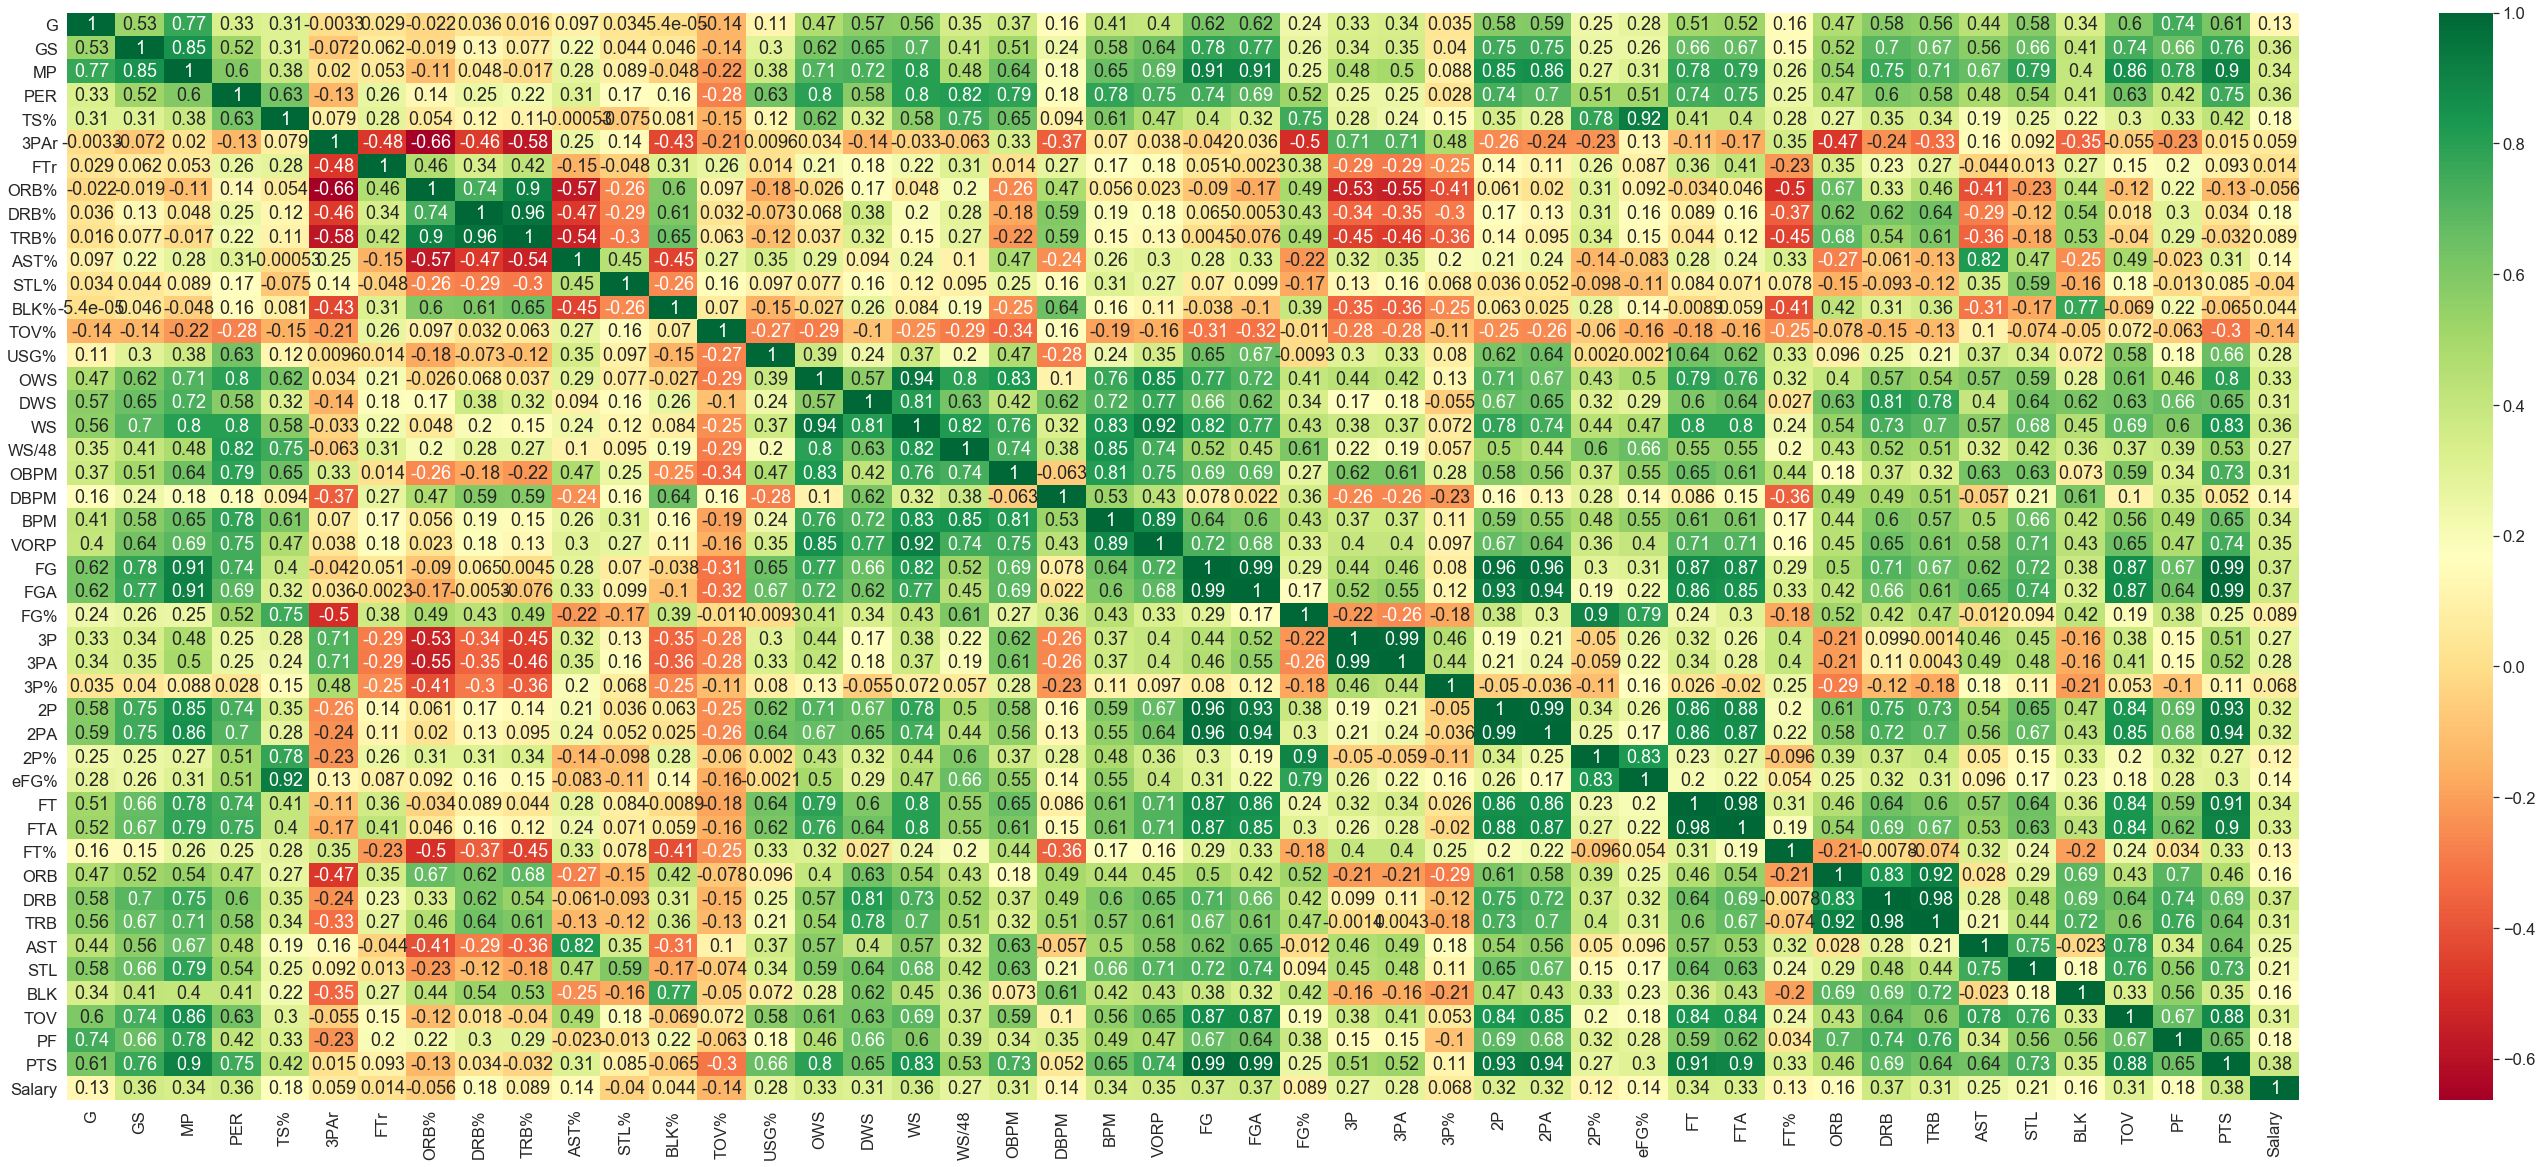

In [134]:
correlationPlot(ml_Model_3_Data)

corr_Matrix = ml_Model_3_Data.corr()

#correlation of output target variable
salary_corr = abs(corr_Matrix['Salary'])

#Selecting highly correlated features with target variable
features = salary_corr[salary_corr>0.35]
print(features)
type(features)

In [104]:
#"GS", "PER", "WS", "BPM", "VORP","FG","FGA","DRB","PTS","Salary" ==> Selected using selectKBest method
average_Correlated_Features = ['GS','PER','WS','VORP','FG','FGA','DRB','PTS','Salary']
correlated_Dataset = ml_Model_3_Data[average_Correlated_Features]
correlated_Dataset.head()

GS   PER   WS  VORP     FG     FGA    DRB     PTS   Salary
0  50.0   8.3  1.6   0.0  138.0   285.0  277.0   362.0   437000
1  74.0  15.4  6.9   2.5  398.0   989.0  176.0  1221.0   825000
2  40.0  15.8  5.7   1.3  438.0   898.0  188.0  1099.0  1115000
3  68.0  16.1  4.8   2.5  506.0  1154.0  257.0  1342.0   725000
4  10.0  14.1  3.1   0.5  371.0   785.0  223.0   860.0   500000

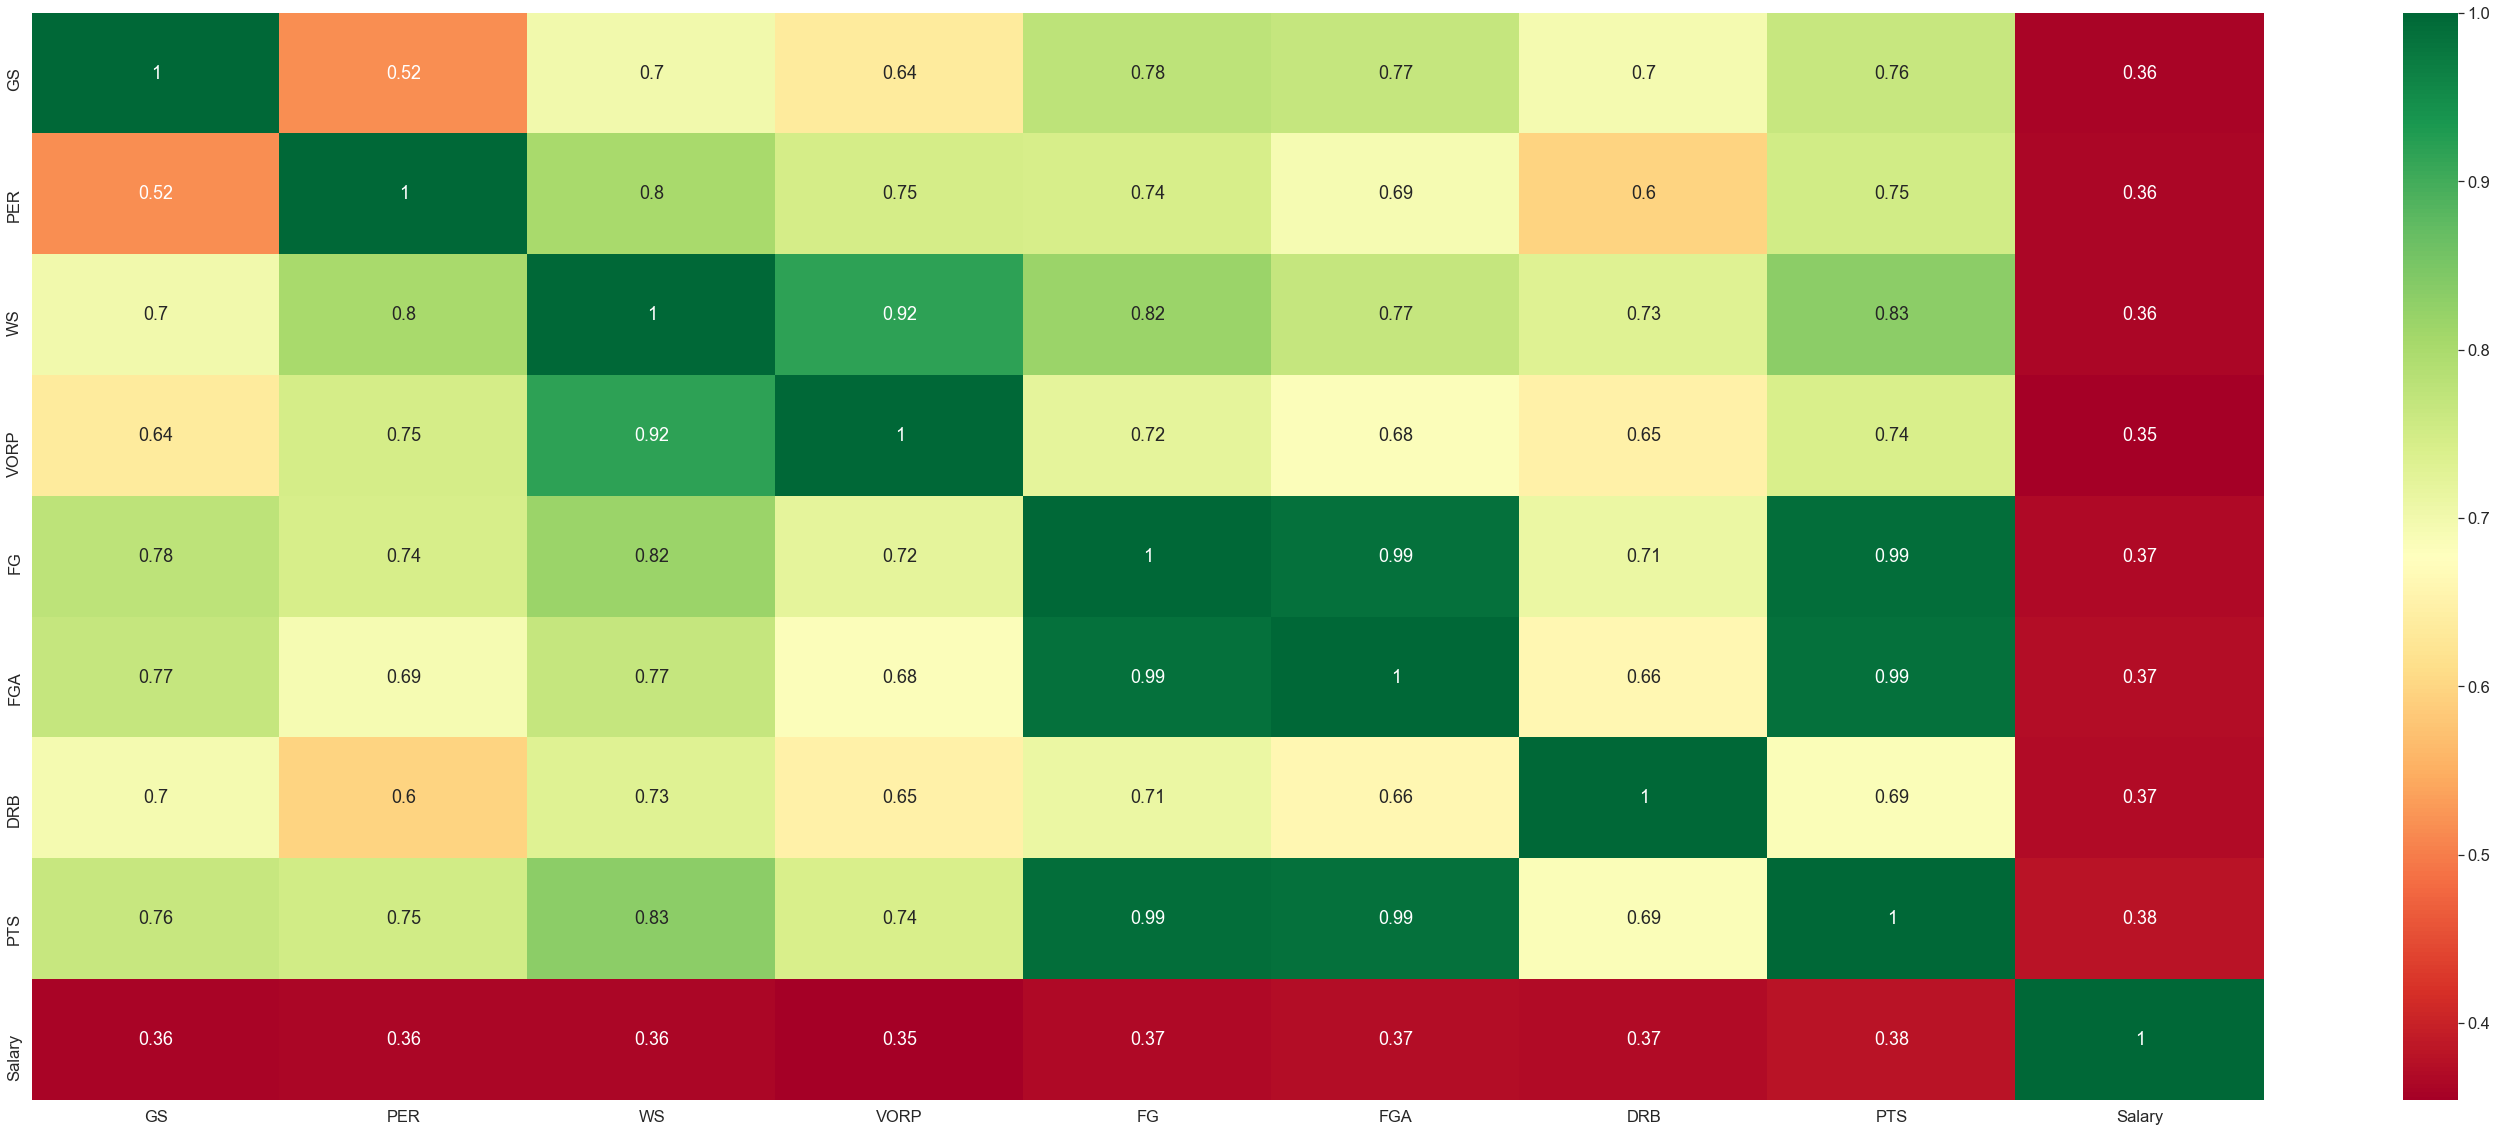

In [105]:
correlationPlot(correlated_Dataset)

In [109]:
vif_Calculate(correlated_Dataset)

variable   VIF
0  Intercept  22.0
1         GS   3.0
2        PER   3.0
3         WS  10.0
4       VORP   6.0
5        FGA   4.0
6        DRB   3.0

In [108]:
correlated_Dataset.drop(columns=['FG'],inplace=True)

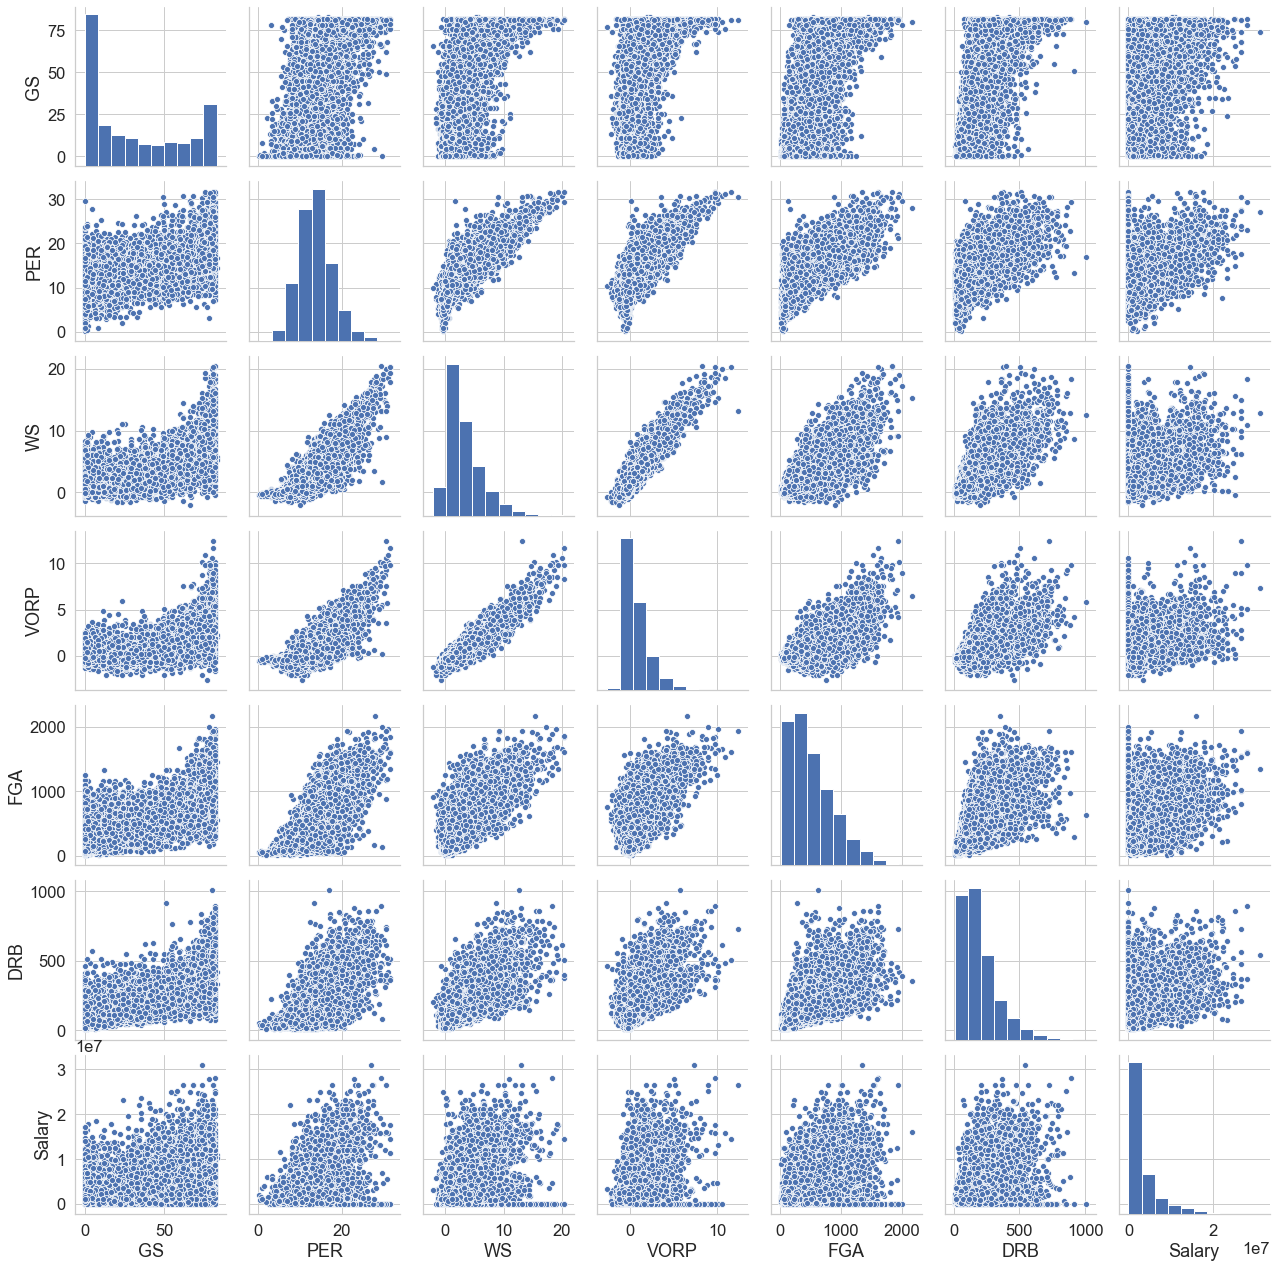

In [110]:
sns.pairplot(correlated_Dataset)

In [111]:
correlated_Dataset.skew()

GS        0.457921
PER       0.532033
WS        1.443274
VORP      1.939109
FGA       0.923519
DRB       1.373937
Salary    2.176810
dtype: float64

In [118]:
def skewness(columnName):
    correlated_Dataset[columnName] = np.sqrt(correlated_Dataset[columnName])
    print(correlated_Dataset.skew())

skewness('Salary')

GS        0.457921
PER       0.532033
WS        0.364132
VORP      0.472254
FGA       0.923519
DRB       0.491009
Salary    0.809843
dtype: float64


/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


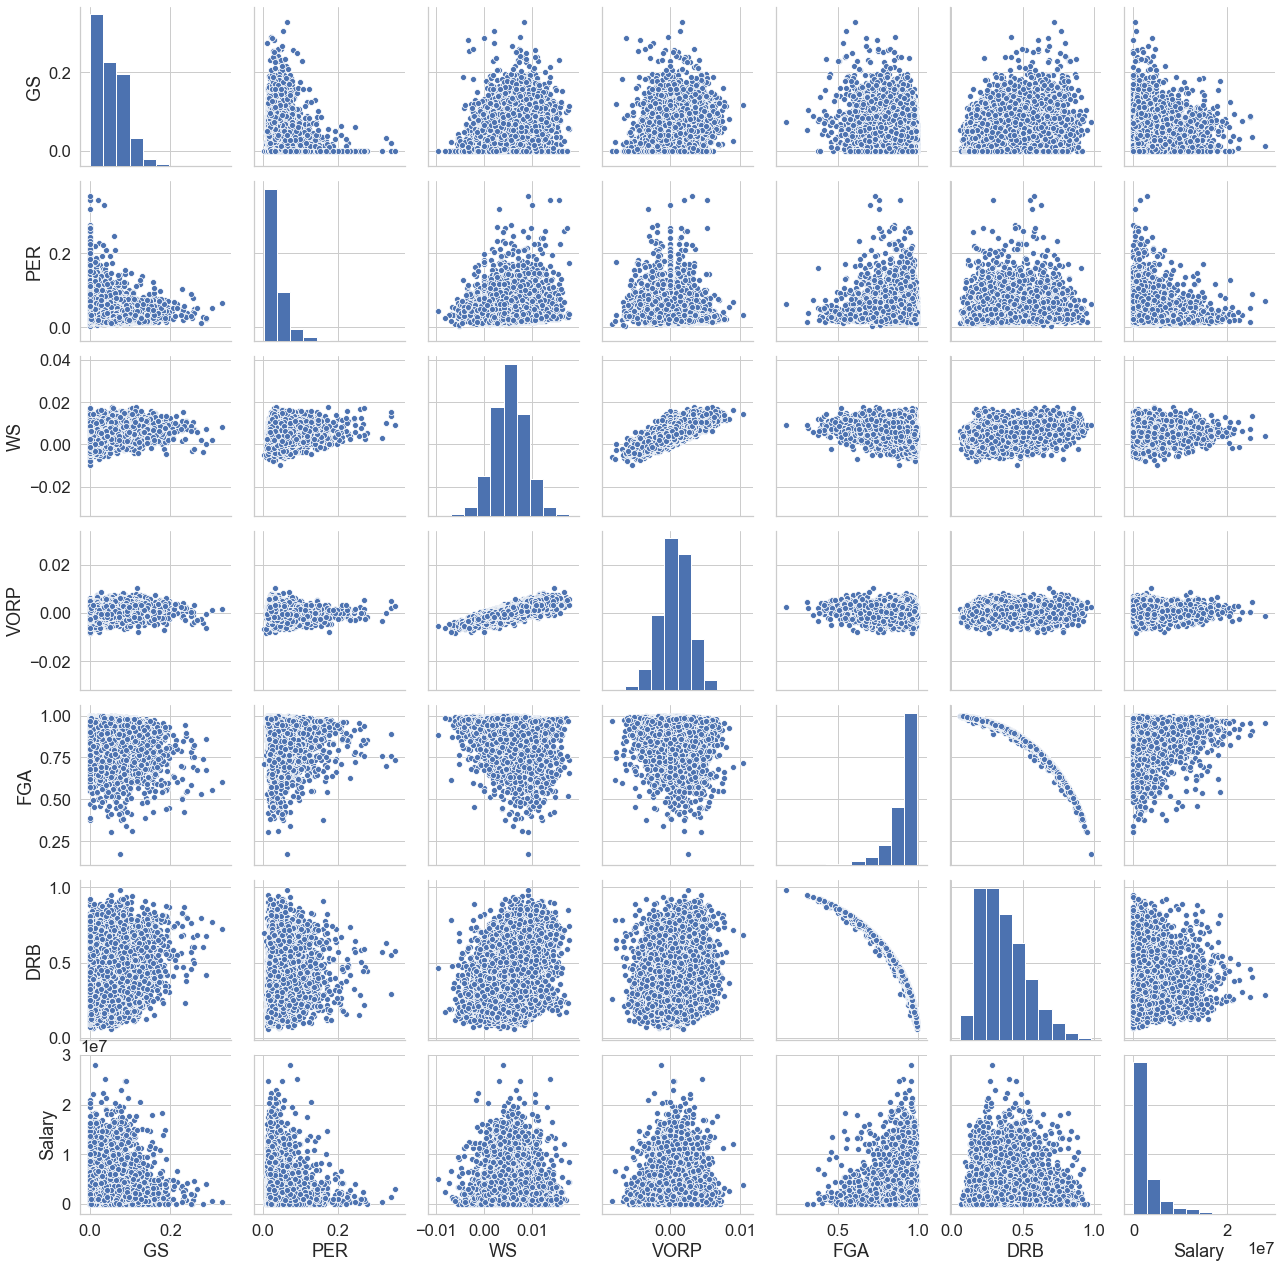

In [100]:
sns.pairplot(normalized_correlated_data)

In [102]:
correlated_Dataset.head(10)

GS   PER        WS      VORP        FGA        DRB       Salary
0  50.0   8.3  1.264911  0.000000  16.881943  16.643317   661.059755
1  74.0  15.4  2.626785  1.581139  31.448370  13.266499   908.295106
2  40.0  15.8  2.387467  1.140175  29.966648  13.711309  1055.935604
3  68.0  16.1  2.190890  1.581139  33.970576  16.031220   851.469318
4  10.0  14.1  1.760682  0.707107  28.017851  14.933185   707.106781
5   0.0  18.7  0.948683  0.316228  11.747340   4.795832   500.000000
6   6.0   8.4  0.447214       NaN  15.459625   9.433981     0.000000
7  28.0  13.0  1.414214       NaN  20.784610  16.155494  1168.332145
8   9.0  14.9  1.341641  0.316228  27.440845  14.456832   851.469318
9   2.0  13.3  1.000000  0.547723  14.525839   9.695360     0.000000

In [119]:
correlated_Dataset.isna().sum()

GS           0
PER          0
WS         501
VORP      3591
FGA          0
DRB          0
Salary       0
dtype: int64

In [120]:
correlated_Dataset = correlated_Dataset.fillna(correlated_Dataset.median())
correlated_Dataset.isna().sum()

GS        0
PER       0
WS        0
VORP      0
FGA       0
DRB       0
Salary    0
dtype: int64

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

x = correlated_Dataset.iloc[:,0:6]
y = correlated_Dataset.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

svr_rbf = LinearRegression()
svr_rbf.fit(X_train,Y_train)
y_pred_train = svr_rbf.predict(X_train)
y_pred_test = svr_rbf.predict(X_test)
mse_train = mean_squared_error(Y_train,y_pred_train)
print("RMSE_train :",np.sqrt(mse_train))
print("R2 score_train: ",round(r2_score(Y_test,y_pred_test),2))
mse_test = mean_squared_error(Y_test,y_pred_test)
print("RMSE_test :",np.sqrt(mse_test))
print("R2 score: ",round(r2_score(Y_test,y_pred_test),2))

RMSE_train : 907.1191835801817
R2 score_train:  0.13
RMSE_test : 939.8482069153296
R2 score:  0.13


In [ ]:
# As per two research papers, the following are the determinants which can be used to predict salary of a NBA Player
determinants_and_target = ['MP','PER','3P','2P','FT','ORB','DRB','AST','STL','BLK','TOV','PF','Pos',"Salary"]
ml_Model_3_Data_With_Selected_Features = ml_Model_3_Data[determinants_and_target]
ml_Model_3_Data_With_Selected_Features = pd.concat([ml_Model_3_Data_With_Selected_Features,pd.get_dummies(ml_Model_3_Data_With_Selected_Features['Pos'],prefix="position")],axis=1)
ml_Model_3_Data_With_Selected_Features.drop(['Pos'],axis=1, inplace=True)
ml_Model_3_Data_With_Selected_Features.head()